# Python assignment

The python assignment you can do either on your own or with one other student (i.e. max group size is 2 students).

The first cell of your notebook, should contain a table with the names and ANRs of the group members, like so

|Name|examnr.|
|----|-------|
|Koen van den Bosch|1259425|
|Martijn Bloemberg|2030381|



See [the webpage](https://janboone.github.io/applied-economics/assignment3.html) for details of what we expect to see in this assignment.



# Abstract

s

## Research Question
**Can we find correlations between the type of criminal activity and the hour of occurrence of this particular activity?** With the help of predictive policing, the resources devoted to preventing criminality can be used more efficiently. 


**Motivation of the problem**

What we hope to find out is: 
 - have overall crime rates dropped
 - has the policy helped to reduce sexual harassment and/or rape
 - 

## Data Collection
We retrieved our data from _URL HERE_, _explain data shrinkage process, what did we do?_
<br>
_How did we find the data, describe the search queries used in google/on the website(s)_

# Importing packages

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlrd 
import csv
import datetime
from sklearn.cluster import KMeans
from collections import Counter

%matplotlib inline
import seaborn as sns; sns.set()

# Importing data and data formatting

Before importing the file, we had to shrinken the file as it consisted of more than 1 million rows, otherwise the kernel died. We end up with a file containing 7347 rows. 

In [146]:
crime = pd.read_csv("DATA/finaldataset.csv")

In [147]:
crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150686774,LIQUOR LAWS,CONSUMING ALCOHOL IN PUBLIC VIEW,Friday,8/7/2015,12:24,SOUTHERN,"ARREST, BOOKED",100 Block of VALENCIA ST,-122.422513,37.770711,"(37.7707107653585, -122.422513037848)",15068677430155
1,40075847,LARCENY/THEFT,GRAND THEFT SHOPLIFTING,Tuesday,1/20/2004,11:20,NORTHERN,"ARREST, BOOKED",2100 Block of POLK ST,-122.421798,37.796440,"(37.7964404207928, -122.421798040888)",4007584706364
2,140705958,VEHICLE THEFT,STOLEN AUTOMOBILE,Thursday,8/21/2014,18:30,BAYVIEW,NONE,JAMESTOWN AV / JENNINGS ST,-122.395431,37.719558,"(37.7195579165862, -122.395431410481)",14070595807021
3,140770177,VEHICLE THEFT,STOLEN TRUCK,Friday,9/12/2014,12:00,PARK,UNFOUNDED,CLAYTON ST / HAIGHT ST,-122.448578,37.769798,"(37.7697977168831, -122.448578484966)",14077017707025
4,40047363,OTHER OFFENSES,VIOLATION OF RESTRAINING ORDER,Tuesday,1/13/2004,11:25,TARAVAL,"ARREST, BOOKED",0 Block of GENEVA AV,-122.451313,37.722453,"(37.7224526962267, -122.451312748281)",4004736315150


In [148]:
#below we set the variables DayOfWeek, Date and Time as time variables.

In [149]:
datetime.datetime.today()

datetime.datetime(2019, 1, 7, 18, 35, 45, 723529)

In [150]:
crime['Date'] = pd.to_datetime(crime['Date'], format='%m/%d/%Y')
crime['Time'] = pd.to_datetime(crime['Time'], format='%H:%M')

In [151]:
#here we extract the hour and weeknumbers
crime['Hour']=[crime['Time'][i].hour for i in range(len(crime))]
crime['Weeknumber']=[crime['Date'][i].isocalendar() for i in range(len(crime))]


In [152]:
#we group by hours, weeknumbers, Categories
groupsHour = crime.groupby('Hour').agg('count')
groupsWeek = crime.groupby('Weeknumber').agg('count')
groupsCategory = crime.groupby('Category').agg('count')


idx=groupsCategory.index.tolist()
x = range(len(idx))
plt.bar(x.index, groupsCategory.values,width=0.2,color='c',align='center');


In [153]:
groupsCategory

,IncidntNum,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Hour,Weeknumber
Category,,,,,,,,,,,,,,
ARSON,7,7,7,7,7,7,7,7,7,7,7,7,7,7
ASSAULT,678,678,678,678,678,678,678,678,678,678,678,678,678,678
BAD CHECKS,1,1,1,1,1,1,1,1,1,1,1,1,1,1
BRIBERY,2,2,2,2,2,2,2,2,2,2,2,2,2,2
BURGLARY,328,328,328,328,328,328,328,328,328,328,328,328,328,328
DISORDERLY CONDUCT,34,34,34,34,34,34,34,34,34,34,34,34,34,34
DRIVING UNDER THE INFLUENCE,20,20,20,20,20,20,20,20,20,20,20,20,20,20
DRUG/NARCOTIC,428,428,428,428,428,428,428,428,428,428,428,428,428,428
DRUNKENNESS,45,45,45,45,45,45,45,45,45,45,45,45,45,45


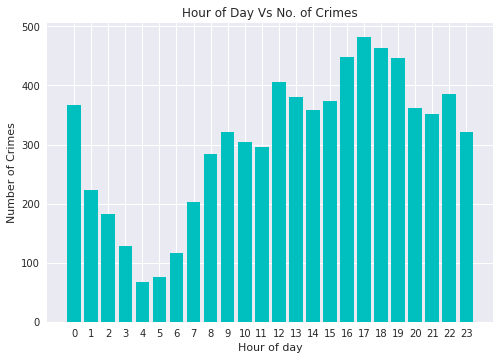

In [154]:
plt.bar(groupsHour.index, groupsHour.X, width=0.8,color='c',align='center')

plt.title("Hour of Day Vs No. of Crimes")
plt.xlabel("Hour of day")
plt.ylabel("Number of Crimes")

tick_val = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.xticks(tick_val)
plt.show()

We see a lot of crimes happening during the late afternoon and the beginning of the evening (16h - 19h)

In [155]:
crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Hour,Weeknumber
0,150686774,LIQUOR LAWS,CONSUMING ALCOHOL IN PUBLIC VIEW,Friday,2015-08-07,1900-01-01 12:24:00,SOUTHERN,"ARREST, BOOKED",100 Block of VALENCIA ST,-122.422513,37.770711,"(37.7707107653585, -122.422513037848)",15068677430155,12,"(2015, 32, 5)"
1,40075847,LARCENY/THEFT,GRAND THEFT SHOPLIFTING,Tuesday,2004-01-20,1900-01-01 11:20:00,NORTHERN,"ARREST, BOOKED",2100 Block of POLK ST,-122.421798,37.796440,"(37.7964404207928, -122.421798040888)",4007584706364,11,"(2004, 4, 2)"
2,140705958,VEHICLE THEFT,STOLEN AUTOMOBILE,Thursday,2014-08-21,1900-01-01 18:30:00,BAYVIEW,NONE,JAMESTOWN AV / JENNINGS ST,-122.395431,37.719558,"(37.7195579165862, -122.395431410481)",14070595807021,18,"(2014, 34, 4)"
3,140770177,VEHICLE THEFT,STOLEN TRUCK,Friday,2014-09-12,1900-01-01 12:00:00,PARK,UNFOUNDED,CLAYTON ST / HAIGHT ST,-122.448578,37.769798,"(37.7697977168831, -122.448578484966)",14077017707025,12,"(2014, 37, 5)"
4,40047363,OTHER OFFENSES,VIOLATION OF RESTRAINING ORDER,Tuesday,2004-01-13,1900-01-01 11:25:00,TARAVAL,"ARREST, BOOKED",0 Block of GENEVA AV,-122.451313,37.722453,"(37.7224526962267, -122.451312748281)",4004736315150,11,"(2004, 3, 2)"


crime['Time'] = pd.to_datetime(crime['Time'], format='%H-%M')

datetime.datetime.strptime(crime['DayOfWeek'],'%Y-%d-%m').strftime('%A')

crime['new'] = pd.to_datetime(crime['DayOfWeek'])

In [156]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7348 entries, 0 to 7347
Data columns (total 15 columns):
IncidntNum    7348 non-null int64
Category      7348 non-null object
Descript      7348 non-null object
DayOfWeek     7348 non-null object
Date          7348 non-null datetime64[ns]
Time          7348 non-null datetime64[ns]
PdDistrict    7348 non-null object
Resolution    7348 non-null object
Address       7348 non-null object
X             7348 non-null float64
Y             7348 non-null float64
Location      7348 non-null object
PdId          7348 non-null int64
Hour          7348 non-null int64
Weeknumber    7348 non-null object
dtypes: datetime64[ns](2), float64(2), int64(3), object(8)
memory usage: 861.2+ KB


In [157]:
#below we sort by date and time in an ascending way.
crimetimes = crime.sort_values(by='Time', ascending=True)
crimedates = crimetimes.sort_values(by='Date', ascending=True)
datesorted = crimedates.reset_index()
del datesorted['index']
datesorted.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Hour,Weeknumber
0,21680269,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2003-01-01,1900-01-01 22:10:00,BAYVIEW,NONE,SELBY ST / PALOU AV,-122.400248,37.739277,"(37.7392774132044, -122.400247774249)",2168026964070,22,"(2003, 1, 3)"
1,30001749,OTHER OFFENSES,OBSCENE PHONE CALLS(S),Wednesday,2003-01-01,1900-01-01 08:30:00,MISSION,NONE,900 Block of TREAT AV,-122.413147,37.754954,"(37.7549540482182, -122.413147019892)",3000174919050,8,"(2003, 1, 3)"
2,30014770,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Friday,2003-01-03,1900-01-01 20:00:00,SOUTHERN,NONE,MCCOPPIN ST / VALENCIA ST,-122.422526,37.771596,"(37.7715962069149, -122.42252632893)",3001477028160,20,"(2003, 1, 5)"
3,30025084,VEHICLE THEFT,STOLEN TRUCK,Tuesday,2003-01-07,1900-01-01 02:30:00,BAYVIEW,NONE,100 Block of OLMSTEAD ST,-122.403120,37.722498,"(37.7224976982068, -122.403120225649)",3002508407025,2,"(2003, 2, 2)"
4,30029105,DRUG/NARCOTIC,POSSESSION OF BASE/ROCK COCAINE,Wednesday,2003-01-08,1900-01-01 04:22:00,TENDERLOIN,"ARREST, BOOKED",JONES ST / ELLIS ST,-122.412784,37.784866,"(37.7848656939297, -122.412784096509)",3002910516621,4,"(2003, 2, 3)"


In [158]:
#we check whether there are indeed 7 unique days (i.e. no typos)
datesorted['DayOfWeek'].unique().tolist() 

['Wednesday', 'Friday', 'Tuesday', 'Thursday', 'Saturday', 'Monday', 'Sunday']

# Data Visualization

In [159]:
#we check the amount of crimes occurred per day
crime1 = crime 
datav = crime1
datav['DayOfWeek'].value_counts()

Friday       1138
Wednesday    1057
Saturday     1048
Tuesday      1045
Thursday     1043
Monday       1032
Sunday        985
Name: DayOfWeek, dtype: int64

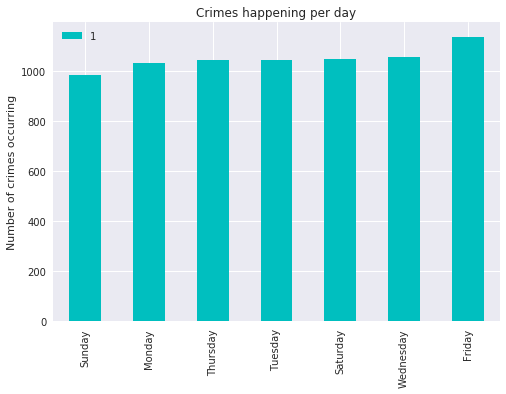

In [160]:
D = {"Monday":1032, "Tuesday":1045, "Wednesday":1057, "Thursday":1043, "Friday":1138, "Saturday":1048, "Sunday":985}
Dsort = [(k, D[k]) for k in sorted(D, key=D.get, reverse=False)]
s = pd.Series(Dsort)
s2 = pd.DataFrame(Dsort)
s3 = s2.plot.bar(color='c', align='center')
plt.ylabel('Number of crimes occurring')
plt.title('Crimes happening per day')
plt.xticks([0,1,2,3,4,5,6], ['Sunday','Monday','Thursday','Tuesday','Saturday','Wednesday','Friday'])
plt.grid(True)
plt.show()

Amount of crimes are ordered from low to high. We see a little spike of the amount of crimes happening on Friday. Crime occurring on other days of the week are roughly equally likely. 

# K Means Clustering

Unsupervised learning, what is it?

Are there missing values?

In [161]:
print(crime.isna().sum())


IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
Hour          0
Weeknumber    0
dtype: int64


Each row contains an crime incident and each observation contains coordinates. We are going to create a k means scatter. 

In [162]:
kcrime = datesorted 

We drop te variables we don't need. 

In [163]:
kcrime.drop(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 
                'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'Location', 'PdId', 'Hour', 'Weeknumber'],
                axis=1, inplace=True)

In [164]:
kcrime.head()

,X,Y
0,-122.400248,37.739277
1,-122.413147,37.754954
2,-122.422526,37.771596
3,-122.403120,37.722498
4,-122.412784,37.784866


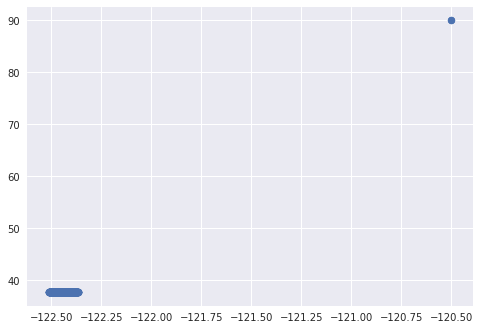

In [165]:
plt.scatter(kcrime.iloc[:,0], kcrime.iloc[:,1])

#We see that there are some outliers. We want to investigate whether there are multiple outliers or only a few.  

In [166]:
kcrime[kcrime['X'] >= -121].count()  

X    2
Y    2
dtype: int64

We have only 2 outliers. For the sake of our analysis, we will drop them, using the command below. As expected, our file now consists of 7436, whereas before it were 7438. 

In [167]:
kcrime1 = kcrime[kcrime['X'] <= -121]  

In [168]:
kcrime1.describe()

,X,Y
count,7346.000000,7346.000000
mean,-122.422877,37.767581
std,0.025491,0.024070
min,-122.513642,37.708031
25%,-122.432915,37.753632
50%,-122.416226,37.775421
75%,-122.406959,37.784401
max,-122.364937,37.819923


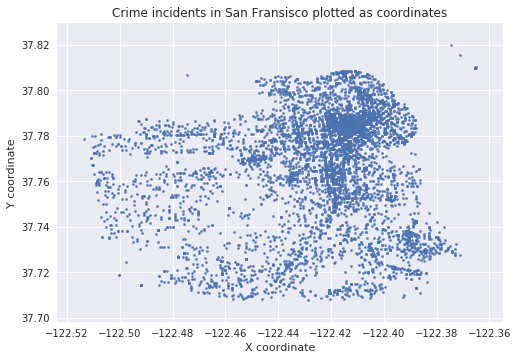

In [169]:
plt.scatter(kcrime1.iloc[:,0], kcrime1.iloc[:,1], s=5)
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Crime incidents in San Fransisco plotted as coordinates')
plt.show()

In [170]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(kcrime1)
y_kmeans = kmeans.predict(kcrime1)
centers = kmeans.cluster_centers_

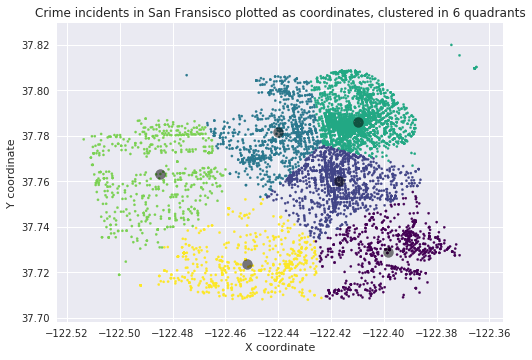

In [171]:
plt.scatter(kcrime1.iloc[:,0], kcrime1.iloc[:,1], c=y_kmeans, s=5, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5) #printing centers
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Crime incidents in San Fransisco plotted as coordinates, clustered in 6 quadrants')
centers = kmeans.cluster_centers_
plt.show()

# Elbow plot

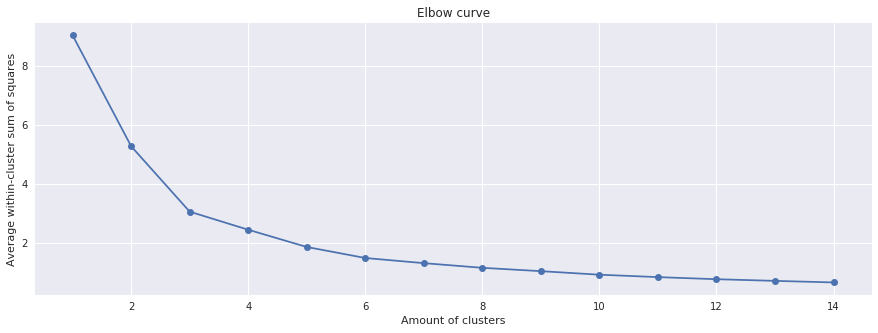

In [172]:
X = kcrime1
distortions = []
rangeq = range(1,15)
for k in rangeq:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(rangeq, distortions, marker='o')
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel('Amount of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.show()

We asssume that the optimal numbers of clusters equals 5. 

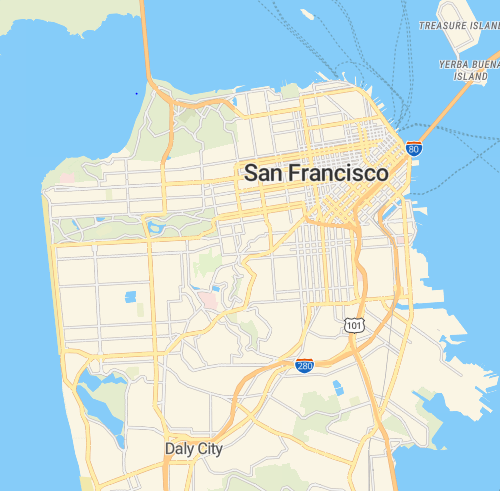

In [173]:
from IPython.display import Image
Image("DATA/map san francisco.png")

Most of the crimes happen in the north east of San Fransisco. But can we find some correlation between location and type of crime?

# Second part of the analysis, extracting assaults

In [174]:
crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Hour,Weeknumber
0,150686774,LIQUOR LAWS,CONSUMING ALCOHOL IN PUBLIC VIEW,Friday,2015-08-07,1900-01-01 12:24:00,SOUTHERN,"ARREST, BOOKED",100 Block of VALENCIA ST,-122.422513,37.770711,"(37.7707107653585, -122.422513037848)",15068677430155,12,"(2015, 32, 5)"
1,40075847,LARCENY/THEFT,GRAND THEFT SHOPLIFTING,Tuesday,2004-01-20,1900-01-01 11:20:00,NORTHERN,"ARREST, BOOKED",2100 Block of POLK ST,-122.421798,37.796440,"(37.7964404207928, -122.421798040888)",4007584706364,11,"(2004, 4, 2)"
2,140705958,VEHICLE THEFT,STOLEN AUTOMOBILE,Thursday,2014-08-21,1900-01-01 18:30:00,BAYVIEW,NONE,JAMESTOWN AV / JENNINGS ST,-122.395431,37.719558,"(37.7195579165862, -122.395431410481)",14070595807021,18,"(2014, 34, 4)"
3,140770177,VEHICLE THEFT,STOLEN TRUCK,Friday,2014-09-12,1900-01-01 12:00:00,PARK,UNFOUNDED,CLAYTON ST / HAIGHT ST,-122.448578,37.769798,"(37.7697977168831, -122.448578484966)",14077017707025,12,"(2014, 37, 5)"
4,40047363,OTHER OFFENSES,VIOLATION OF RESTRAINING ORDER,Tuesday,2004-01-13,1900-01-01 11:25:00,TARAVAL,"ARREST, BOOKED",0 Block of GENEVA AV,-122.451313,37.722453,"(37.7224526962267, -122.451312748281)",4004736315150,11,"(2004, 3, 2)"


Below we sort by time of crime. By printing the lenght of the dataframes, we can see to which extent the data shrinks. 

In [175]:
crimeq = crime
print(len(crimeq))
sub_crime = crimeq[(crimeq['Category'] == "ASSAULT")] #look at just Assaults
print(len(sub_crime))

7348
678


In [176]:
coordinates = ['X', 'Y']
crime_X = sub_crime[coordinates] #Here we sort by Assault and coordinates together ONLY
print(crimeq.Category.describe())

count              7348
unique               37
top       LARCENY/THEFT
freq               1418
Name: Category, dtype: object


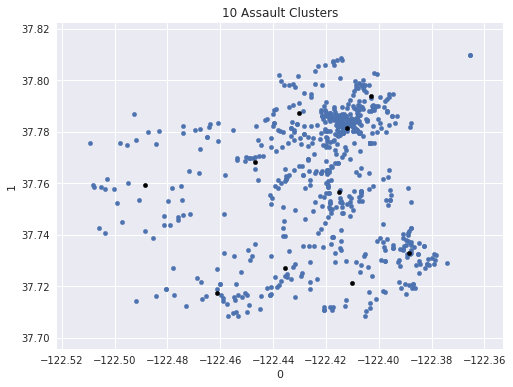

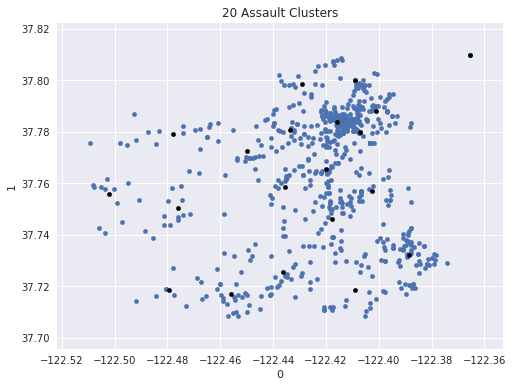

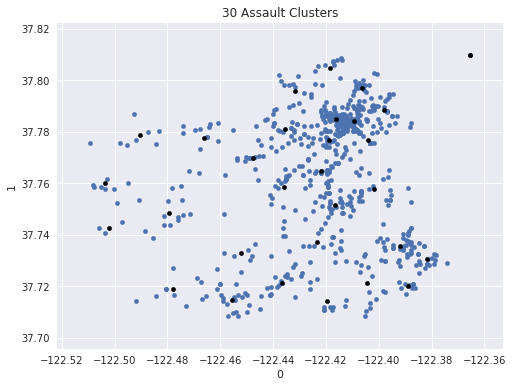

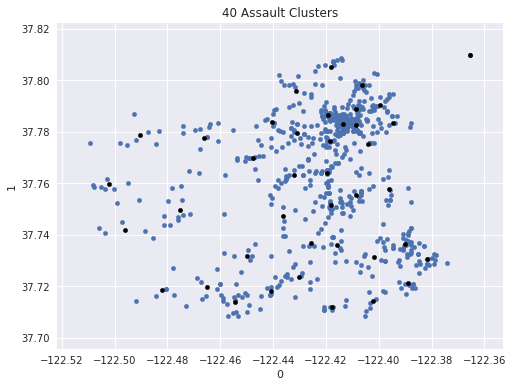

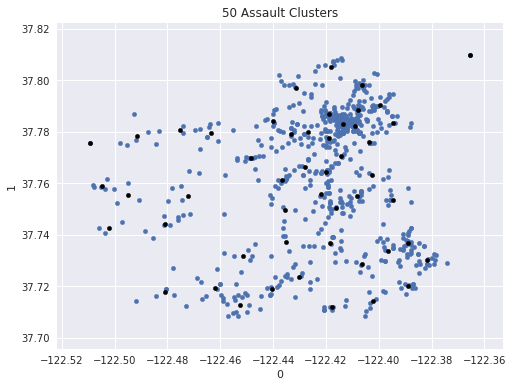

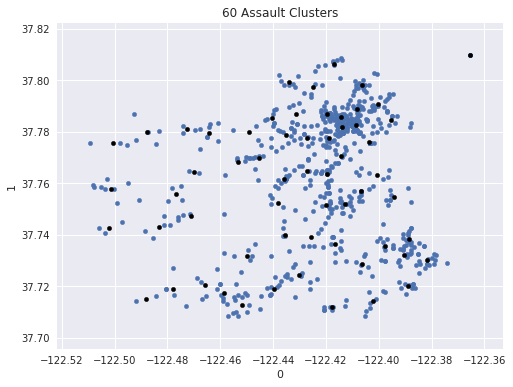

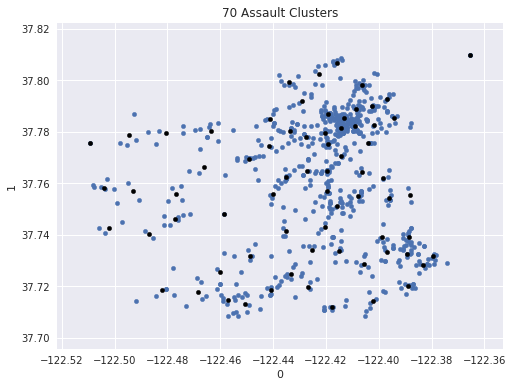

In [177]:
for num_clusters in range(10,75,10):
    km = KMeans(num_clusters)
    km_fit = km.fit(crime_X)
    ax = crime_X.plot(kind='scatter',x='X',y='Y', legend=str(num_clusters), figsize=(8, 6))
    pd.DataFrame(km_fit.cluster_centers_).plot(kind='scatter',x=0,y=1,color='k',ax=ax)
    ax.set_title(str(num_clusters) + " Assault Clusters")
    
    plt.show()

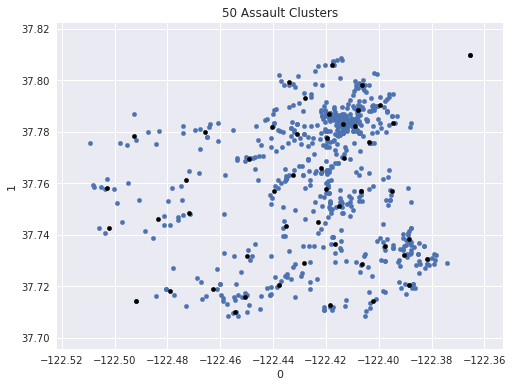

In [187]:
    num_clusters=50
    km = KMeans(num_clusters)
    km_fit = km.fit(crime_X)
    ax1 = crime_X.plot(kind='scatter',x='X',y='Y', legend=str(num_clusters), figsize=(8, 6))
    pd.DataFrame(km_fit.cluster_centers_).plot(kind='scatter',x=0,y=1,color='k',ax=ax1)
    ax1.set_title(str(num_clusters) + " Assault Clusters")
    
    plt.show()

# Extracting hour

As we have seen from

In [179]:
crimew = crime
print(len(crimew))
sub_crimew = crimeq[(crimeq['Hour'] == 17)] #look at crime incidents happening at 17 pm.
print(len(sub_crimew))

7348
482


In [180]:
crime_Y = sub_crime[coordinates]

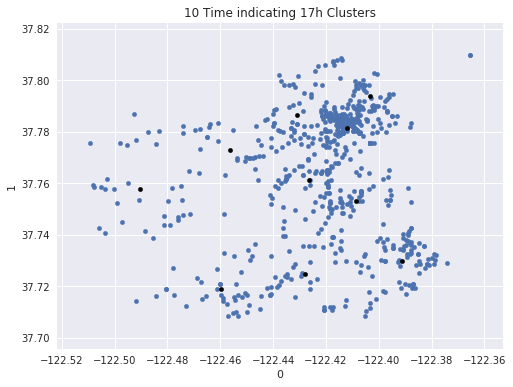

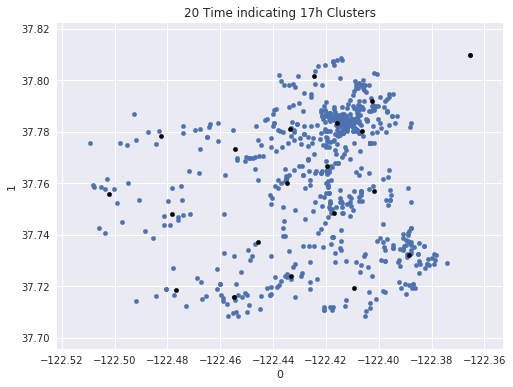

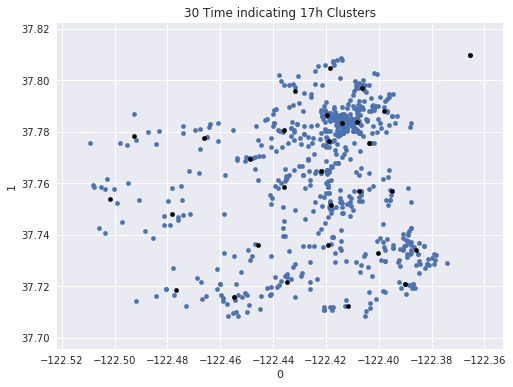

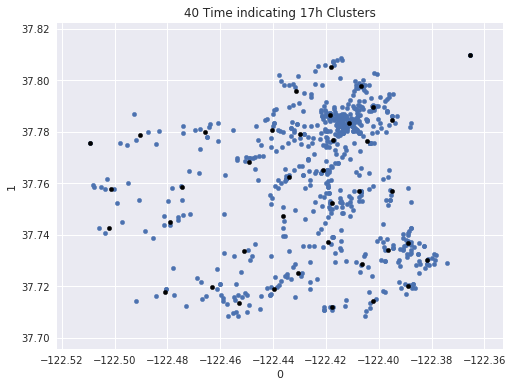

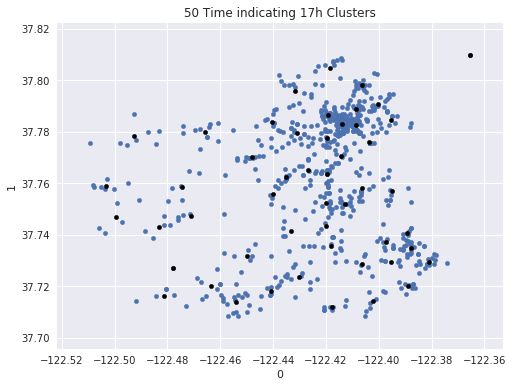

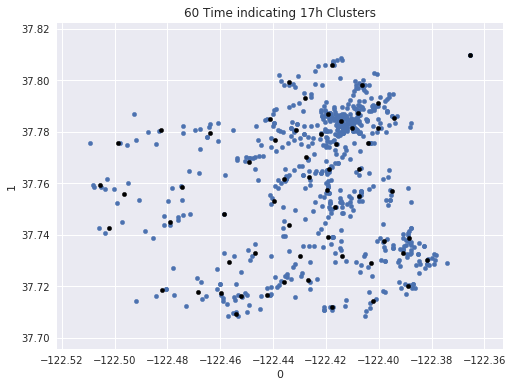

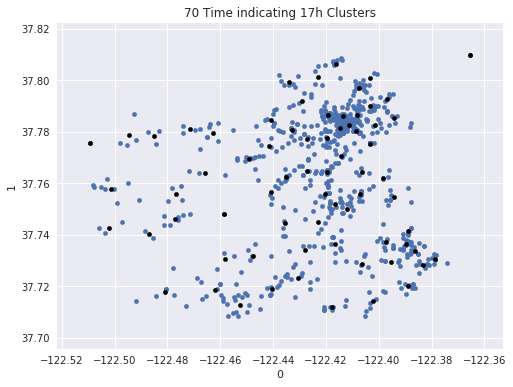

In [197]:
for num_clust in range(10,75,10):
    km = KMeans(num_clust)
    km_fitt = km.fit(crime_Y)
    ax = crime_X.plot(kind='scatter',x='X',y='Y', legend=str(num_clust), figsize=(8, 6))
    pd.DataFrame(km_fitt.cluster_centers_).plot(kind='scatter',x=0,y=1,color='k',ax=ax)
    ax.set_title(str(num_clust) + " Time indicating 17h Clusters")
    
    plt.show()

We choose 50 clusters

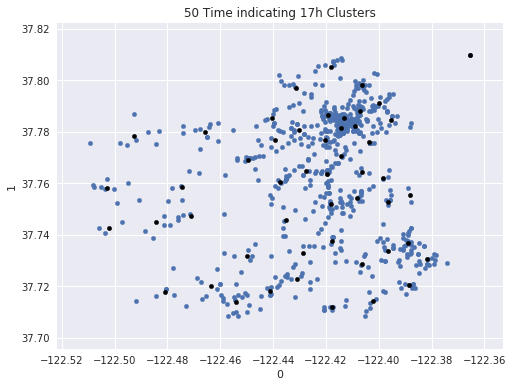

In [198]:
    num_clust=50
    km = KMeans(num_clust)
    km_fitt = km.fit(crime_Y)
    ax2 = crime_X.plot(kind='scatter',x='X',y='Y', legend=str(num_clust), figsize=(8, 6))
    pd.DataFrame(km_fitt.cluster_centers_).plot(kind='scatter',x=0,y=1,color='k',ax=ax2)
    ax2.set_title(str(num_clust) + " Time indicating 17h Clusters")
    
    plt.show()

Now check for overlap

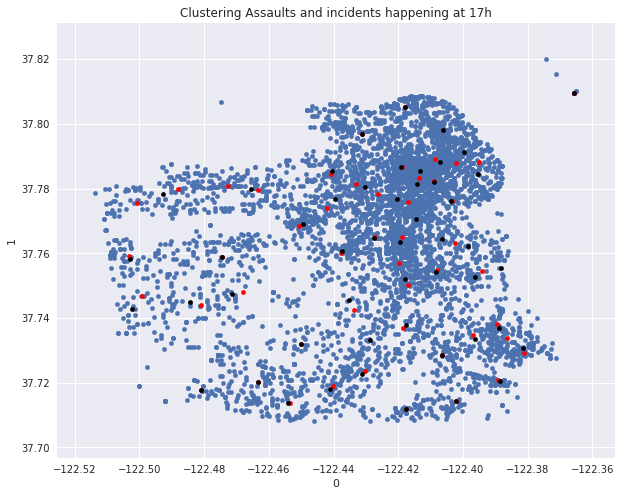

In [204]:
kcrime1base = kcrime1.plot(kind='scatter',x='X',y='Y', legend=str(num_clusters), figsize=(10, 8))

pd.DataFrame(km_fit.cluster_centers_).plot(kind='scatter',x=0,y=1,color='r', ax=kcrime1base)
pd.DataFrame(km_fitt.cluster_centers_).plot(kind='scatter',x=0,y=1,color='k',ax=kcrime1base)
kcrime1base.set_title("Clustering Assaults and incidents happening at 17h")
plt.show()